In [1]:
#importing required packages

#for text
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
from nltk.corpus import stopwords
from string  import punctuation
from nltk.collocations import *
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import wordnet as wn
from nltk.wsd import lesk
from nltk.probability  import FreqDist
from heapq import nlargest
from collections import defaultdict


#for donwload the webpage

import requests
import webbrowser
from bs4 import BeautifulSoup
import httplib2
import httpbin
import requests
import httplib2
import urllib
import pandas as pd
import numpy as np
import webbrowser
from pprint import pprint
import json 

#for sentiments analysis

import twitter
import json
from collections import Counter
import os 
import nltk
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from collections import Counter
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

[nltk_data] Downloading package vader_lexicon to C:\Users\Alejandro
[nltk_data]     Perez\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# URL

In [2]:
inturea_url = 'https://inturea.com/'
webbrowser.open(inturea_url)

True

In [3]:
http = httplib2.Http()

# Extracción de head y body html de cada página

In [4]:
resp_inturea, data_inturea = http.request(inturea_url)

In [5]:
# Codificando el html - body

inturea_html = data_inturea.decode('UTF-8')

# Limpieza de  codigo html

soup_inturea = BeautifulSoup(inturea_html)


In [6]:
cells = soup_inturea.find_all(['p', 'span', 'h1', 'h2', 'h3', 'h4', 'li' 'ul'])
for cell in cells:
    print(cell.text.strip())

Menú
CONTACTO
CONTACTO
Menú
CONTACTO
CONTACTO
Menú
Estrategias de marketing turístico para proyectos con visión innovadora
Estrategias de marketing
turístico para proyectos
con visión innovadora
CONFIRMAR

CONFIRMAR
Posiciónate como la marcaturística de referencia
Posiciónate como la marcaturística de referencia
Posiciónatecomo la marcaturísticade referencia
Posiciónatecomo la marcaturísticade referencia

Somos la  agencia especializada en marketing turístico que convierte tu visión en una realidad.  Atrae, cuida y afianza a ese viajero que busca experiencias únicas.  Comunica tu experiencia de marca a todos los niveles.
agencia especializada en marketing turístico
Nuestros clientes
Nuestros clientes
Nuestros clientes
Nuestros clientes
Anterior
Siguiente
Los viajeros cambian.Los viajeros evolucionan.
Los viajeros cambian.Los viajeros evolucionan.
¿Y tú? ¿Hasta dónde quieres llegar?
¿Y tú?
¿Hasta dónde quieres llegar?
La diferencia es la clave
La diferencia es la clave
La diferenciaes l

In [7]:
text = ' '.join(map(lambda p: p.text, soup_inturea.find_all(['p', 'span', 'h1', 'h2', 'h3', 'h4', 'li' 'ul'])))
text

'Menú  CONTACTO  CONTACTO Menú  CONTACTO  CONTACTO Menú Estrategias de marketing turístico para proyectos con visión innovadora Estrategias de marketing  turístico para proyectos  con visión innovadora    CONFIRMAR    CONFIRMAR  Posiciónate como la marcaturística de referencia  Posiciónate como la marcaturística de referencia  Posiciónatecomo la marcaturísticade referencia  Posiciónatecomo la marcaturísticade referencia  Somos la  agencia especializada en marketing turístico que convierte tu visión en una realidad.  Atrae, cuida y afianza a ese viajero que busca experiencias únicas.  Comunica tu experiencia de marca a todos los niveles.  agencia especializada en marketing turístico   Nuestros clientes  Nuestros clientes  Nuestros clientes  Nuestros clientes Anterior Siguiente  Los viajeros cambian.Los viajeros evolucionan.  Los viajeros cambian.Los viajeros evolucionan. ¿Y tú? ¿Hasta dónde quieres llegar? ¿Y tú?  ¿Hasta dónde quieres llegar?  La diferencia es la clave  La diferencia es

In [8]:
text.encode('ascii', errors='replace').replace(b"?", b" ")

b'Men   CONTACTO  CONTACTO Men   CONTACTO  CONTACTO Men  Estrategias de marketing tur stico para proyectos con visi n innovadora Estrategias de marketing  tur stico para proyectos  con visi n innovadora    CONFIRMAR    CONFIRMAR  Posici nate como la marcatur stica de referencia  Posici nate como la marcatur stica de referencia  Posici natecomo la marcatur sticade referencia  Posici natecomo la marcatur sticade referencia  Somos la  agencia especializada en marketing tur stico que convierte tu visi n en una realidad.  Atrae, cuida y afianza a ese viajero que busca experiencias  nicas.  Comunica tu experiencia de marca a todos los niveles.  agencia especializada en marketing tur stico   Nuestros clientes  Nuestros clientes  Nuestros clientes  Nuestros clientes Anterior Siguiente  Los viajeros cambian.Los viajeros evolucionan.  Los viajeros cambian.Los viajeros evolucionan.  Y t    Hasta d nde quieres llegar   Y t     Hasta d nde quieres llegar   La diferencia es la clave  La diferencia e

In [9]:
sents = sent_tokenize(text)
sents

['Menú  CONTACTO  CONTACTO Menú  CONTACTO  CONTACTO Menú Estrategias de marketing turístico para proyectos con visión innovadora Estrategias de marketing  turístico para proyectos  con visión innovadora    CONFIRMAR    CONFIRMAR  Posiciónate como la marcaturística de referencia  Posiciónate como la marcaturística de referencia  Posiciónatecomo la marcaturísticade referencia  Posiciónatecomo la marcaturísticade referencia  Somos la  agencia especializada en marketing turístico que convierte tu visión en una realidad.',
 'Atrae, cuida y afianza a ese viajero que busca experiencias únicas.',
 'Comunica tu experiencia de marca a todos los niveles.',
 'agencia especializada en marketing turístico   Nuestros clientes  Nuestros clientes  Nuestros clientes  Nuestros clientes Anterior Siguiente  Los viajeros cambian.Los viajeros evolucionan.',
 'Los viajeros cambian.Los viajeros evolucionan.',
 '¿Y tú?',
 '¿Hasta dónde quieres llegar?',
 '¿Y tú?',
 '¿Hasta dónde quieres llegar?',
 'La diferenci

In [10]:
word_sent = word_tokenize(text.lower())
word_sent

['menú',
 'contacto',
 'contacto',
 'menú',
 'contacto',
 'contacto',
 'menú',
 'estrategias',
 'de',
 'marketing',
 'turístico',
 'para',
 'proyectos',
 'con',
 'visión',
 'innovadora',
 'estrategias',
 'de',
 'marketing',
 'turístico',
 'para',
 'proyectos',
 'con',
 'visión',
 'innovadora',
 'confirmar',
 'confirmar',
 'posiciónate',
 'como',
 'la',
 'marcaturística',
 'de',
 'referencia',
 'posiciónate',
 'como',
 'la',
 'marcaturística',
 'de',
 'referencia',
 'posiciónatecomo',
 'la',
 'marcaturísticade',
 'referencia',
 'posiciónatecomo',
 'la',
 'marcaturísticade',
 'referencia',
 'somos',
 'la',
 'agencia',
 'especializada',
 'en',
 'marketing',
 'turístico',
 'que',
 'convierte',
 'tu',
 'visión',
 'en',
 'una',
 'realidad',
 '.',
 'atrae',
 ',',
 'cuida',
 'y',
 'afianza',
 'a',
 'ese',
 'viajero',
 'que',
 'busca',
 'experiencias',
 'únicas',
 '.',
 'comunica',
 'tu',
 'experiencia',
 'de',
 'marca',
 'a',
 'todos',
 'los',
 'niveles',
 '.',
 'agencia',
 'especializada',
 '

In [11]:
constomStopWords = set(stopwords.words('spanish') + list(punctuation))

constomStopWords

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste

In [12]:
word_sent=[word for word in word_sent if word not in constomStopWords]
word_sent

['menú',
 'contacto',
 'contacto',
 'menú',
 'contacto',
 'contacto',
 'menú',
 'estrategias',
 'marketing',
 'turístico',
 'proyectos',
 'visión',
 'innovadora',
 'estrategias',
 'marketing',
 'turístico',
 'proyectos',
 'visión',
 'innovadora',
 'confirmar',
 'confirmar',
 'posiciónate',
 'marcaturística',
 'referencia',
 'posiciónate',
 'marcaturística',
 'referencia',
 'posiciónatecomo',
 'marcaturísticade',
 'referencia',
 'posiciónatecomo',
 'marcaturísticade',
 'referencia',
 'agencia',
 'especializada',
 'marketing',
 'turístico',
 'convierte',
 'visión',
 'realidad',
 'atrae',
 'cuida',
 'afianza',
 'viajero',
 'busca',
 'experiencias',
 'únicas',
 'comunica',
 'experiencia',
 'marca',
 'niveles',
 'agencia',
 'especializada',
 'marketing',
 'turístico',
 'clientes',
 'clientes',
 'clientes',
 'clientes',
 'anterior',
 'siguiente',
 'viajeros',
 'cambian.los',
 'viajeros',
 'evolucionan',
 'viajeros',
 'cambian.los',
 'viajeros',
 'evolucionan',
 '¿y',
 '¿hasta',
 'dónde',
 'q

In [30]:
noWords = ['”', '“', '·', 'cookies', '«', '»','quieres', 'si', 'visión', 'to', '–','contacto',  'and', '©', '1','—',  '2','u', '7','are', '¿', '¿hasta', '¿por' , '100','¿y', '...', '``', '’', '48', '‘', '…' , 's.l', 'menú', '\r','\n' ]
freq_list = [word for word in word_sent if word not in noWords]
freq_list

['estrategias',
 'marketing',
 'turístico',
 'proyectos',
 'innovadora',
 'estrategias',
 'marketing',
 'turístico',
 'proyectos',
 'innovadora',
 'confirmar',
 'confirmar',
 'posiciónate',
 'marcaturística',
 'referencia',
 'posiciónate',
 'marcaturística',
 'referencia',
 'posiciónatecomo',
 'marcaturísticade',
 'referencia',
 'posiciónatecomo',
 'marcaturísticade',
 'referencia',
 'agencia',
 'especializada',
 'marketing',
 'turístico',
 'convierte',
 'realidad',
 'atrae',
 'cuida',
 'afianza',
 'viajero',
 'busca',
 'experiencias',
 'únicas',
 'comunica',
 'experiencia',
 'marca',
 'niveles',
 'agencia',
 'especializada',
 'marketing',
 'turístico',
 'clientes',
 'clientes',
 'clientes',
 'clientes',
 'anterior',
 'siguiente',
 'viajeros',
 'cambian.los',
 'viajeros',
 'evolucionan',
 'viajeros',
 'cambian.los',
 'viajeros',
 'evolucionan',
 'dónde',
 'llegar',
 'dónde',
 'llegar',
 'diferencia',
 'clave',
 'diferencia',
 'clave',
 'diferenciaes',
 'clave',
 'diferenciaes',
 'clave

In [31]:
freq = FreqDist(freq_list)
freq

FreqDist({'turístico': 13, 'marketing': 6, 'proyectos': 6, 'clientes': 6, 'viajeros': 6, 'referencia': 4, 'clave': 4, 'negocio': 4, 'aquí': 4, 'trabajar': 4, ...})

In [32]:
nlargest(10, freq_list, key=freq.get)

['turístico',
 'turístico',
 'turístico',
 'turístico',
 'turístico',
 'turístico',
 'turístico',
 'turístico',
 'turístico',
 'turístico']

In [33]:
ranking = defaultdict(int)

for i,sent in enumerate(sents):
    for w in word_tokenize(sent.lower()):
        if w in freq:
            ranking[i] += freq[w]
            
ranking

defaultdict(int,
            {0: 119,
             1: 9,
             2: 6,
             3: 67,
             4: 16,
             6: 4,
             8: 4,
             9: 32,
             10: 8,
             11: 37,
             12: 10,
             13: 37,
             14: 10,
             15: 8,
             16: 8,
             17: 6,
             18: 6,
             19: 116,
             20: 22,
             21: 29,
             22: 23,
             23: 70,
             24: 37,
             25: 173,
             26: 10,
             27: 12,
             28: 10,
             29: 17,
             30: 12,
             31: 32,
             32: 29,
             33: 19,
             34: 11,
             35: 44,
             36: 18})

In [34]:
sents_idx = nlargest(4, ranking, key=ranking.get)
sents_idx

[25, 0, 19, 23]

In [35]:
[sents[j] for j in sorted(sents_idx)]

['Menú  CONTACTO  CONTACTO Menú  CONTACTO  CONTACTO Menú Estrategias de marketing turístico para proyectos con visión innovadora Estrategias de marketing  turístico para proyectos  con visión innovadora    CONFIRMAR    CONFIRMAR  Posiciónate como la marcaturística de referencia  Posiciónate como la marcaturística de referencia  Posiciónatecomo la marcaturísticade referencia  Posiciónatecomo la marcaturísticade referencia  Somos la  agencia especializada en marketing turístico que convierte tu visión en una realidad.',
 'Proyectos estratégicosde marketing turístico  Proyectos estratégicosde marketing turístico  Proyectos estratégicos demarketing turístico  Proyectos estratégicos demarketing turístico Cuando te planteas trabajar un producto o servicioturístico en constante evolución necesitas una visiónestratégica.',
 'NUESTROS SERVICIOS  NUESTROS SERVICIOS   HABLAMOS  HABLAMOS  El Traveller Journey  El Traveller Journey  El TravellerJourney  El TravellerJourney Cuando el foco se pone en

In [36]:
import twitter
import json
from collections import Counter
import os 
import nltk
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from collections import Counter
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer



data_folder = os.path.join(os.path.expanduser("~"), "Data", "twitter")
output_filename = os.path.join(data_folder, "python_tweets.json")
# Go to https://developer.twitter.com/en/apps to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://developer.twitter.com/en/docs/basics/authentication/overview/oauth
# for more information on Twitter's OAuth implementation.

CONSUMER_KEY = 'soYOytOxNqM3iOTqAeIbxnlDX'
CONSUMER_SECRET = 'AMMUddKaTwR6Y8VehQmVnH1jKPHBSMEvG31W7OjWYrl3tiqXkR'
OAUTH_TOKEN = '1429859845545631749-kZgY0wLEpKLsCqrRe6BTwK0IfcIxc8'
OAUTH_TOKEN_SECRET = 'ZXqMhYZ3F9d97RyAZMuI2e2myCb3cCdXf462ToXmDG9sB'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

[nltk_data] Downloading package vader_lexicon to C:\Users\Alejandro
[nltk_data]     Perez\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
# listas de busqueda


tweets = []
original_users = [] 
tweets_marketing_turístico = []
tweets_marketing = []
tweets_turismo = []
user_ids = {}

In [38]:
#analizer 

analyzer = SentimentIntensityAnalyzer()



key_1 = "marketing turístico"
key_2 = "marketing"
key_4 = "turismo"


#tweets_download_keyword_marketing_digital

count = 1000
query = "key_1"
tweets = twitter_api.search.tweets(q=query, count=count, 
   lang='es',tweet_mode="extended")

tweetsWithSent = []
for t in tweets['statuses']:
    text = (t['full_text'])
    ps = analyzer.polarity_scores(text)
    tweetsWithSent.append({'text':text, 'compound':ps['compound']})
    tweets_marketing_turístico.append({'text':text, 'compound':ps['compound']})


#tweets_download_keyword_marketing


count = 1000
query = "key_2"
tweets = twitter_api.search.tweets(q=query, count=count, 
   lang='es',tweet_mode="extended")


for t in tweets['statuses']:
    text = (t['full_text'])
    ps = analyzer.polarity_scores(text)
    tweetsWithSent.append({'text':text, 'compound':ps['compound']})
    tweets_marketing.append({'text':text, 'compound':ps['compound']})
    
    

#tweets_download_keyword_turismo_digital

count = 1000
query = "key_3"
tweets = twitter_api.search.tweets(q=query, count=count, 
   lang='es',tweet_mode="extended")


for t in tweets['statuses']:
    text = (t['full_text'])
    ps = analyzer.polarity_scores(text)
    tweetsWithSent.append({'text':text, 'compound':ps['compound']})
    tweets_turismo.append({'text':text, 'compound':ps['compound']})
    

In [39]:
#creando las tablas


tweetdf_marketing_turístico = pd.DataFrame(tweets_marketing_turístico)

tweetdf_marketing = pd.DataFrame(tweets_marketing)

tweetdf_turismo = pd.DataFrame(tweets_turismo)


In [40]:
#Cambiando nombres

tweetdf_marketing_turístico.rename(columns={'text' : 'tweets_marketing_turístico' , 'compound':'compound_marketing_turístico' }, inplace=True)
tweetdf_marketing.rename(columns={'text' : 'tweets_marketing' , 'compound':'compound_marketing' }, inplace=True)
tweetdf_turismo.rename(columns={'text' : 'tweets_turismo' , 'compound':'compound_turismo' }, inplace=True)


# Convert scores into positive and negetive sentiments using some threshold
tweetdf_marketing_turístico['Sentiment'] = np.where(tweetdf_marketing_turístico['compound_marketing_turístico'] >= 0 , 'Positive', 'Negative')
tweetdf_marketing['Sentiment'] = np.where(tweetdf_marketing['compound_marketing'] >= 0 , 'Positive', 'Negative')
tweetdf_turismo['Sentiment'] = np.where(tweetdf_turismo['compound_turismo'] >= 0 , 'Positive', 'Negative')


,tweets_marketing_turístico,compound_marketing_turístico,Sentiment
0,RT @SoompiSpanish: #Key de #SHINee y #Taeyeon ...,-0.1779,Negative
1,RT @SoompiSpanish: #Key de #SHINee y #Taeyeon ...,-0.1779,Negative
2,General reminder 🌚 https://t.co/6qpl1l7uRa,0.0000,Positive
3,RT @latamshinee: [TEASER GOALS 🏁] 280821\n\n#K...,-0.2500,Negative
4,RT @kodkeydotcom: Sir Alex Ferguson key to Cri...,0.0000,Positive
...,...,...,...
95,RT @latamshinee: [TEASER GOALS 🏁] 280821\n\n#K...,-0.2500,Negative
96,RT @latamshinee: [TEASER GOALS 🏁] 280821\n\n#K...,-0.2500,Negative
97,RT @onewmysun: YA TENEMOS METAS PARA EL TEASER...,-0.4084,Negative
98,Yo creo que en dos semanas más lo termino 👀 #K...,0.0000,Positive


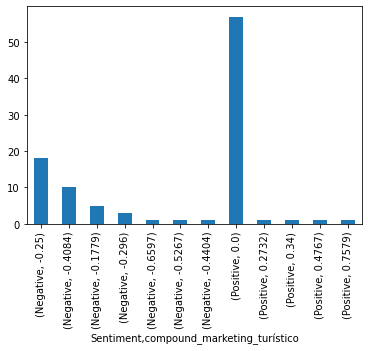

In [41]:


#Sample code snippet
#result=tweetdf_marketing_digital.groupby('compound_marketing_digital')['Sentiment'].value_counts().unstack()
#result[['Negative','Positive']].plot(kind='bar', 
#stacked=True, color='rb')

result=tweetdf_marketing_turístico.groupby('Sentiment')['compound_marketing_turístico'].value_counts()


ax = result.plot.bar(stacked=True)

tweetdf_marketing_turístico

,tweets_marketing,compound_marketing,Sentiment
0,RT @ffilomino: tan solo ayer estaban llamando ...,0.00,Positive
1,RT @ARMYForce_Peru: 💗 #BUTTERTHEEREMIXToday 💗\...,0.00,Positive
2,— 2° temporada: https://t.co/b9SZScAITB,0.00,Positive
3,— Sobrenatural 2° Capítulo\nhttps://t.co/aUuUl...,0.00,Positive
4,RT @skzstartline: En 5hs. Stray Kids presentar...,0.00,Positive
...,...,...,...
95,RT @St4Ylly: STATIONHEAD es una aplicación de ...,0.00,Positive
96,RT @latamshinee: [KEY🗝] 250821\n\n🔺Se ha inclu...,0.34,Positive
97,RT @BeatrizHLeon: Se va cerrando la ventana de...,0.00,Positive
98,RT @latamshinee: [KEY🗝] 250821\n\n🔺Se ha inclu...,0.34,Positive


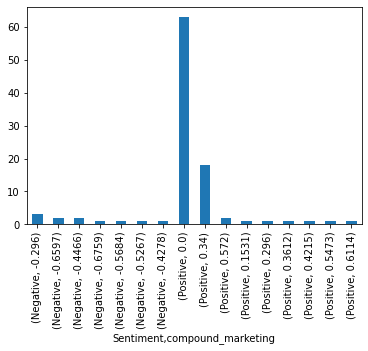

In [42]:
result=tweetdf_marketing.groupby('Sentiment')['compound_marketing'].value_counts()


ax = result.plot.bar(stacked=True)

tweetdf_marketing

,tweets_turismo,compound_turismo,Sentiment
0,"te amo key &lt;33 me haces feliz, eres mi luga...",0.0000,Positive
1,@hlnliz ay graciass key &lt;33,0.0000,Positive
2,@hlnliz TE AMO \n&lt; key 3,0.0000,Positive
3,— 3° temporada:\n\nhttps://t.co/plHo6XMh7g,0.0000,Positive
4,— Sobrenatural 3° Capítulo\nhttps://t.co/r5s1C...,0.0000,Positive
...,...,...,...
95,#SHINee #KEY #KEY_HateThat #HateThat\n👑 💎 KEY ...,-0.7324,Negative
96,🟪Chollito del día🟪\n\nXbox Live Gold de 3 Mese...,0.0000,Positive
97,¡Escuela Key albergará una ‘open house’ para l...,0.0000,Positive
98,"2a de LPA 1° KUKULATOR (4) con PEREYRA, WIL...",0.0000,Positive


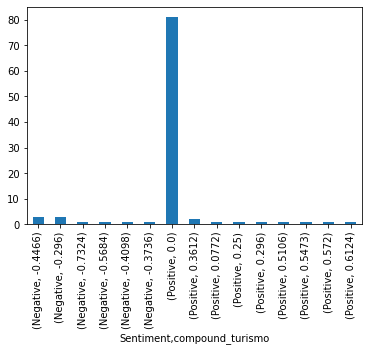

In [43]:
result=tweetdf_turismo.groupby('Sentiment')['compound_turismo'].value_counts()


ax = result.plot.bar(stacked=True)

tweetdf_turismo